In [1]:
%matplotlib inline
#Import necessary library
import pandas as pd
import numpy as np
import matplotlib as plt
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
import datetime

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
#di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

#Reading the dataset in a dataframe using Pandas
#big5 = pd.read_csv("b5_csv.csv") 
#h3 = pd.read_csv("h3_csv.csv")
#eo = pd.read_csv("eo_csv.csv")
#tpb = pd.read_csv("tpb_csv.csv")
#sn = pd.read_csv("sn_csv.csv")
#pbc = pd.read_csv("pbc_csv.csv")
#intent = pd.read_csv("intent_csv.csv")
#behave = pd.read_csv("behave_csv.csv")
indata = pd.read_csv("input.csv")
outdata = pd.read_csv("output.csv")

# Entrepreneurial Quotient and Profiling Report

### Personal Details

In [4]:
print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))
print('Name: Mr. X')
print("ID: %s" % indata['ID'].ix[0])

Timestamp: 2017-06-09 16:09:23
Name: Mr. X
ID: 1001017007


### Entrepreneurial Quotient (EQ)

In [10]:
#Entrepreneurial Quotient (EQ) Calculation

tpb = pd.DataFrame()
sn = pd.DataFrame()
pbc = pd.DataFrame()
intent = pd.DataFrame()
behave = pd.DataFrame()
big5 = pd.DataFrame()
h3 = pd.DataFrame()

#Calculating average TPB
tpb['AverageTPB'] = (indata[['TPB01','TPB02','TPB03','TPB04','TPB05']].sum(axis=1))/5
#tpb.head(5)

#Calculating average SN
sn['AverageSN'] = (indata[['SN01','SN02']].sum(axis=1))/2
#sn.head(5)

#Calculating average PBC
pbc['AveragePBC'] = (indata[['PBC01','PBC02', 'PBC03', 'PBC04']].sum(axis=1))/4
#pbc.head(5)

#Calculating average Intention
intent['AverageIntent'] = (indata[['Int01','Int02', 'Int03', 'Int04']].sum(axis=1))/4
#intent.head(5)

#Calculating average Behavior
behave['AverageBhv'] = (indata[['Beh01','Beh02', 'Beh03', 'Beh04']].sum(axis=1))/4
#behave.head(5)

EQ = indata[["ID"]].copy()
EQ['EQValue'] = -0.130 + (0.237*(tpb["AverageTPB"])) + (0.515*(sn["AverageSN"])) + (0.130*(pbc["AveragePBC"])) + (0.121*(behave["AverageBhv"]))

EQ = EQ.drop(EQ[EQ.EQValue == -0.130].index)

#EQ.head(5)
print("Your EQ Score: %8.2f / 7.00" % EQ['EQValue'].ix[0])
print("Current Population Average EQ Score: %8.2f" % outdata['EQValue'].mean())

Your EQ Score:     5.51 / 7.00
Current Population Average EQ Score:     4.43


### Big Five Personality Traits

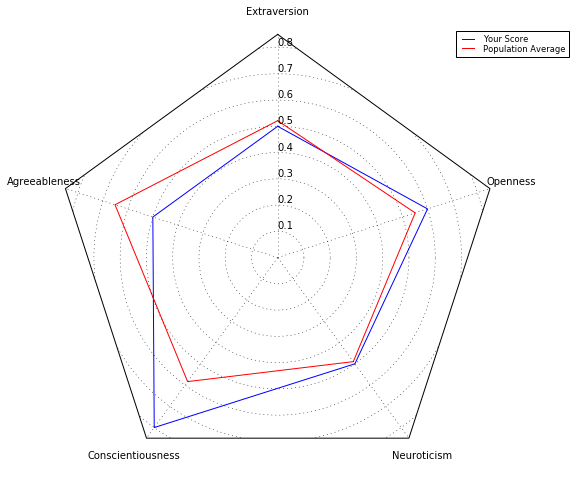

In [11]:
#Getting marks into Big 5 Category
big5['Extraversion'] = (abs(indata['B501'] - 5) + indata['B506'])/10 #Q1 (reverse) + Q6 / 10
big5['Agreeableness'] = (abs(indata['B507'] - 5) + indata['B502'])/10 #Q7 (reverse) + Q2 / 10
big5['Conscientiousness'] = (abs(indata['B503'] - 5) + indata['B508'])/10 #Q3 (reverse) + Q8 / 10
big5['Neuroticism'] = (abs(indata['B504'] - 5) + indata['B509'])/10 #Q4 (reverse) + Q9 / 10
big5['Openness'] = (abs(indata['B505'] - 5) + indata['B510'])/10 #Q5 (reverse) + Q10 / 10
proB5 = big5[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']].copy()

#proB5.head(10)

#Draw Radar Chart of Big5
from radar import radar_graph

labels = proB5.columns.values
values = proB5.ix[0]
avg = [outdata["Extraversion"].mean(), outdata["Agreeableness"].mean(), outdata["Conscientiousness"].mean(), 
           outdata["Neuroticism"].mean(), outdata["Openness"].mean()]
data = ['Your Score', 'Population Average']

radar_graph(labels, values, avg, data)

**Descriptions:**

* _Openness_ – Openness to experience is a strong predictor of who will become and success as a leader. Common traits include curious, imaginative, artistic, wide range of interests, excitable, unconventional, original, daring, and generally prefer variety over fixed routines.

* _Conscientiousness_ – this is the best predictor of both personal and professional success as well as leadership. Common traits include efficient, organized, dutifulness (not careless), thorough, self-discipline, hardworking, ambitious, energetic, persevering, deliberation (not impulsive) and like planning things in advance.

* _Extraversion_ – Often taken as another predictor for leadership (however, studies have shown introverts can do just as well in leadership roles). Common traits include gregariousness, assertiveness, energetic, adventurous, enthusiastic, outgoing, sociable, fun-loving, affectionate, friendly, talkative, and derive energy from social activities.
* _Agreeableness_ – Research suggests that agreeable people tend to be happier, maybe due to their tendency to avoid negative experiences. (However, disagreeable people more likely to succeed as they’re often better at ensuring their voices heard.) Common traits include forgiving, straightforward, warm, compliant, modest, sympathetic, kind, affectionate and likely to engage in volunteerism.

* _Neuroticism_ – it is a long-term tendency to be in a negative emotional state. Common traits include tense, irritable, depressed, shy, moody, anxiety, worrisome, insecure, self-concious and  temperamental.

### Entrepreneurial Orientation

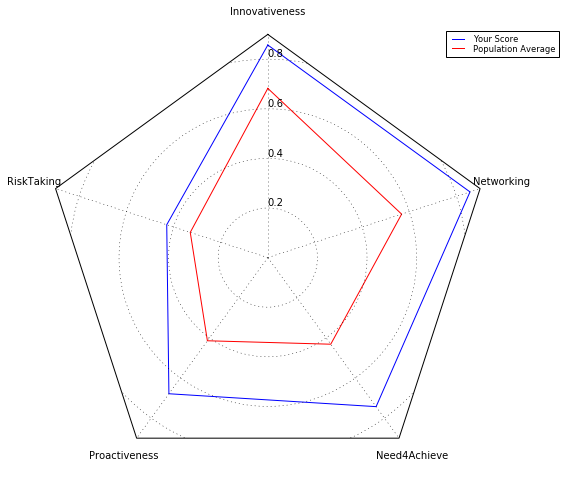

In [12]:
#Entrepreneurial Orientation (EO)
#Calculate points
proEO = indata[['ID']].copy()
proEO['Innovativeness'] = (indata[['EOInno01','EOInno02','EOInno03','EOInno04','EOInno05','EOInno06','EOInno07']].sum(axis=1))/49 
proEO['RiskTaking'] = abs((indata[['EORisk01','EORisk02','EORisk03']].sum(axis=1)) - 21)/21
proEO['Proactiveness'] = abs((indata[['EOPro01','EOPro02','EOPro03', 'EOPro04']].sum(axis=1)) - 28)/28
proEO['Need4Achieve'] = abs((indata[['EOAch01','EOAch02','EOAch03', 'EOAch04', 'EOAch05']].sum(axis=1)) - 35)/35
proEO['Networking'] = (indata[['EONet01','EONet02','EONet03','EONet04','EONet05','EONet06']].sum(axis=1))/42 

proEO = proEO.drop(proEO[proEO.Innovativeness == 0].index)
#proEO.head(10)
radarEO = proEO[['Innovativeness', 'RiskTaking', 'Proactiveness', 'Need4Achieve', 'Networking']].copy()

#Draw Radar Chart of EO
from radar import radar_graph


labels = radarEO.columns.values
values = radarEO.ix[0]
avg = [outdata["Innovativeness"].mean(), outdata["RiskTaking"].mean(), outdata["Proactiveness"].mean(), 
           outdata["Need4Achieve"].mean(), outdata["Networking"].mean()]

data = ['Your Score', 'Population Average']

radar_graph(labels, values, avg, data)


**Descriptions:**

Entrepreneurial Orientation is a group of psychological traits linked with entrepreneur’s personality. The dimensions used for this application are innovativeness, risk-taking, proactiveness, need for achievement and networking.
* _Innovativeness_ – the tendency and ability of someone carrying out innovation. Innovativeness is also manifested via the acts of problem solving, arriving at creative solutions, experimenting with new ideas, creating new products and services.

* _Risk-Taking_ – entrepreneurs are individuals that take on the risk of loss or profit. Thus, this dimension measures the tendency and ability of someone to take on risk. Risk-taking for entrepreneurs include situations such as new product development, entering a new market, and undertaking a new venture.

* _Proactiveness_ – the ability to capture new opportunities, monitor current and future trends, predict customers’ new requirements and changes in demands, emergence of new challenges and opportunities. In other words, tendency for forward-looking view typical of potential entrepreneurs who able to seize opportunities to develop new business or to be involved in new ventures in an existing business.

* _Need for Achievement_ – the tendency or desire to overcome barriers, to test their strengths, to carry out a difficult task well and quickly. Often individuals with high need for achievement set goals that are challenging and appreciate feedback to evaluate their performance, compete with their own standards for success and seek to continuously improve their performance.

* _Networking_ – the propensity to connect and interact with other people. Entrepreneurs network to achieve competitive edge by enlarging their pool of available resources far beyond those that is owned by them.   


### Dream Team Characteristics

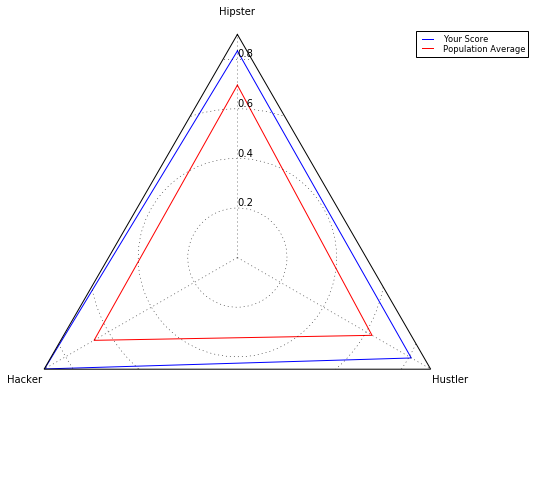

In [13]:
#getting the maximum values for 3H and corrsponding profile
h3['Hipster'] = indata[['HIP01', 'HIP02', 'HIP03', 'HIP04', 'HIP05', 'HIP06']].sum(axis=1)/42
h3['Hacker'] = indata[['HAC01', 'HAC02', 'HAC03', 'HAC04', 'HAC05', 'HAC06', 'HAC07']].sum(axis=1)/49
h3['Hustler'] = indata[['HUS01', 'HUS02', 'HUS03', 'HUS04', 'HUS05', 'HUS06']].sum(axis=1)/42

h3 = h3.drop(h3[h3.Hipster == 0].index)

#Copying results of 3H into new DF
proH3 = h3[['Hipster', 'Hacker', 'Hustler']].copy()

#Draw Radar Chart of 3H
from radar import radar_graph

labels = proH3.columns.values
values = proH3.ix[0]
avg = [outdata["Hipster"].mean(), outdata["Hacker"].mean(), outdata["Hustler"].mean()]
data = ['Your Score', 'Population Average']

radar_graph(labels, values, avg, data)


**Descriptions:**

It is widely believed a high performing team or the dream team consists of three main characters; the Hipster, Hacker and Hustler.

* _Hipster_ – Normally the creative talent with an eye for design, giving input to ensure what is being produced have the cool factor. He/she would be best to be in charge of delivering great customer/user experience. Common traits associated to hipsters include creative, empathetic, thoughtful, good communicator and minimalist.

* _Hacker_ – the MacGyver of the team. He/she have the technical skills to actually build the product or create the solution. Normally would be the quiet one during meetings and when they do voice up it is most likely than not to explain the “how?” an idea can be executed into reality. Common traits associated to hackers include analytical, structured, reliable, focused and stress-resistant.

* _Hustler_ - the one that will be concern with whether the cool or innovative product is actually something the target customer or user would want. Have the skills to generate interest in the product being produced among the target markets. If the hackers often equate to geeks, the hustlers would then be the popular jocks. Common traits associated to hustlers include go-getter, die-hard, disciplined, extroverted and networker. 


In [14]:
Result01 = pd.concat([EQ, proB5, radarEO, proH3], axis=1)
#Result01.head(1)

#total_rows = Result01.count()
#print (total_rows +1)

In [15]:
Result01.to_csv('outtest.csv')

<A HREF="javascript:window.print()">Click to Print This Page</A>